In [8]:
# Conditional GAN for Basic Shape Generation (PyTorch) with Further Enhancements

import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# Constants
SHAPES = ['circle', 'square']
IMAGE_SIZE = 28
DATA_DIR = './shape_data'
NOISE_DIM = 100
LABEL_DIM = len(SHAPES)
IMG_DIM = IMAGE_SIZE * IMAGE_SIZE
BATCH_SIZE = 64
EPOCHS = 70

def generate_shape_image(shape):
    img = Image.new('L', (IMAGE_SIZE, IMAGE_SIZE), color=0)
    draw = ImageDraw.Draw(img)
    padding = 5
    if shape == 'circle':
        draw.ellipse([padding, padding, IMAGE_SIZE - padding, IMAGE_SIZE - padding], fill=255)
    elif shape == 'square':
        draw.rectangle([padding, padding, IMAGE_SIZE - padding, IMAGE_SIZE - padding], fill=255)
    return img

# Create dataset
os.makedirs(DATA_DIR, exist_ok=True)
for i in range(5000):
    shape = random.choice(SHAPES)
    img = generate_shape_image(shape)
    img.save(os.path.join(DATA_DIR, f"{shape}_{i}.png"))

label_map = {shape: idx for idx, shape in enumerate(SHAPES)}

class ShapeDataset(Dataset):
    def __init__(self, dir_path, transform=None):
        self.files = os.listdir(dir_path)
        self.dir_path = dir_path
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        fname = self.files[idx]
        label_str = fname.split('_')[0]
        label = label_map[label_str]
        image = Image.open(os.path.join(self.dir_path, fname)).convert('L')
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.RandomAffine(degrees=1.0, translate=(0.01, 0.01), scale=(0.995, 1.005)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
])

# Dataset and Loader
dataset = ShapeDataset(DATA_DIR, transform)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Enhanced Generator and Discriminator
class Generator(nn.Module):
    def __init__(self, noise_dim, label_dim):
        super().__init__()
        self.label_embed = nn.Linear(label_dim, 50)
        self.model = nn.Sequential(
            nn.Linear(noise_dim + 50, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 2048),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(0.2),
            nn.Linear(2048, 784),
            nn.Tanh()
        )

    def forward(self, z, labels):
        label_embed = self.label_embed(labels)
        x = torch.cat([z, label_embed], dim=1)
        img = self.model(x)
        return img

class Discriminator(nn.Module):
    def __init__(self, img_dim, label_dim):
        super().__init__()
        self.label_embed = nn.Linear(label_dim, 50)
        self.model = nn.Sequential(
            nn.Linear(img_dim + 50, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_embed = self.label_embed(labels)
        x = torch.cat([img, label_embed], dim=1)
        return self.model(x)

def one_hot(labels, num_classes):
    return F.one_hot(labels, num_classes).float()

# Initialize
G = Generator(NOISE_DIM, LABEL_DIM).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
D = Discriminator(IMG_DIM, LABEL_DIM).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
opt_G = optim.Adam(G.parameters(), lr=3e-4, betas=(0.5, 0.999))
opt_D = optim.Adam(D.parameters(), lr=3e-5, betas=(0.5, 0.999))  # reduced discriminator lr
bce_loss = nn.BCELoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



Epoch 1 | D Loss: 1.3936 | G Loss: 0.7106
Epoch 2 | D Loss: 1.3879 | G Loss: 0.7333
Epoch 3 | D Loss: 1.3830 | G Loss: 0.7398
Epoch 4 | D Loss: 1.3551 | G Loss: 0.7569
Epoch 5 | D Loss: 1.3855 | G Loss: 0.7464
Epoch 6 | D Loss: 1.3889 | G Loss: 0.7428
Epoch 7 | D Loss: 1.3857 | G Loss: 0.7677
Epoch 8 | D Loss: 1.3455 | G Loss: 0.7590
Epoch 9 | D Loss: 1.3877 | G Loss: 0.7446
Epoch 10 | D Loss: 1.3797 | G Loss: 0.7263


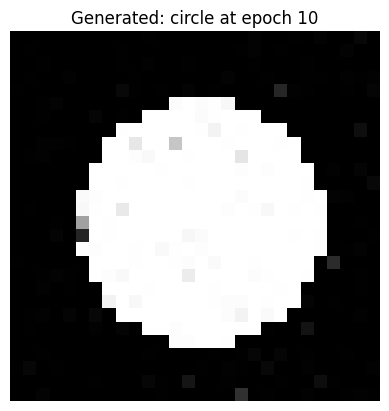

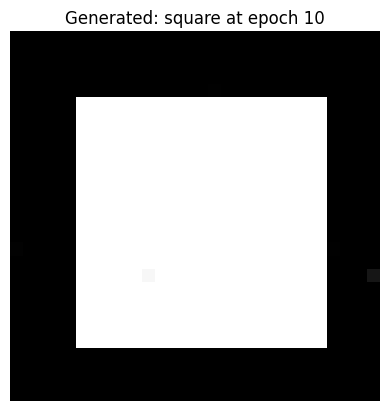

Epoch 11 | D Loss: 1.3766 | G Loss: 0.7459
Epoch 12 | D Loss: 1.3970 | G Loss: 0.7621
Epoch 13 | D Loss: 1.3929 | G Loss: 0.7314
Epoch 14 | D Loss: 1.3620 | G Loss: 0.7470
Epoch 15 | D Loss: 1.3911 | G Loss: 0.7554
Epoch 16 | D Loss: 1.3760 | G Loss: 0.7542
Epoch 17 | D Loss: 1.3974 | G Loss: 0.7393
Epoch 18 | D Loss: 1.2062 | G Loss: 0.8893
Epoch 19 | D Loss: 1.3735 | G Loss: 0.7897
Epoch 20 | D Loss: 1.3704 | G Loss: 0.8110


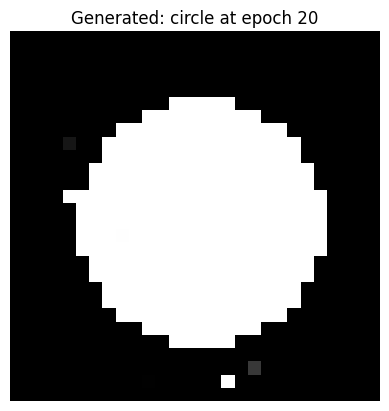

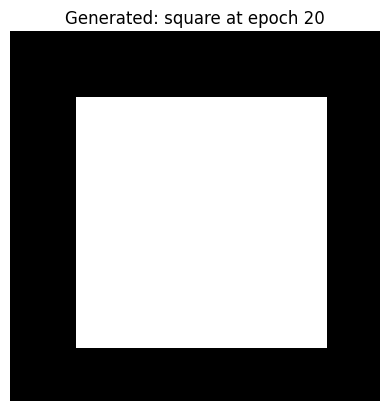

Epoch 21 | D Loss: 1.3597 | G Loss: 0.7755
Epoch 22 | D Loss: 1.3509 | G Loss: 0.8144
Epoch 23 | D Loss: 1.3864 | G Loss: 0.7807
Epoch 24 | D Loss: 1.3223 | G Loss: 0.7971
Epoch 25 | D Loss: 1.4025 | G Loss: 0.7419
Epoch 26 | D Loss: 1.3402 | G Loss: 0.7806
Epoch 27 | D Loss: 1.3814 | G Loss: 0.7733
Epoch 28 | D Loss: 1.3916 | G Loss: 0.7590
Epoch 29 | D Loss: 1.3825 | G Loss: 0.7361
Epoch 30 | D Loss: 1.3737 | G Loss: 0.7548


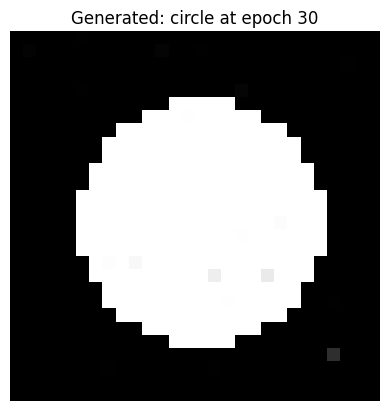

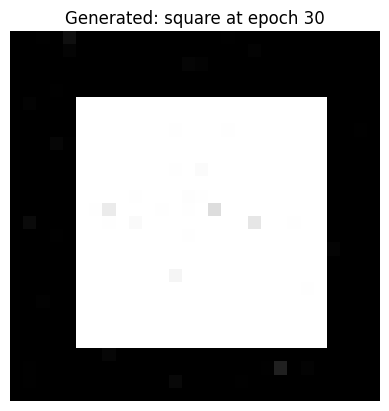

Epoch 31 | D Loss: 1.3942 | G Loss: 0.7229
Epoch 32 | D Loss: 1.3891 | G Loss: 0.7405
Epoch 33 | D Loss: 1.3795 | G Loss: 0.7674
Epoch 34 | D Loss: 1.3993 | G Loss: 0.7410
Epoch 35 | D Loss: 1.3920 | G Loss: 0.7390
Epoch 36 | D Loss: 1.3835 | G Loss: 0.7435
Epoch 37 | D Loss: 1.3767 | G Loss: 0.7363
Epoch 38 | D Loss: 1.3784 | G Loss: 0.7514
Epoch 39 | D Loss: 1.3792 | G Loss: 0.7476
Epoch 40 | D Loss: 1.3819 | G Loss: 0.7508


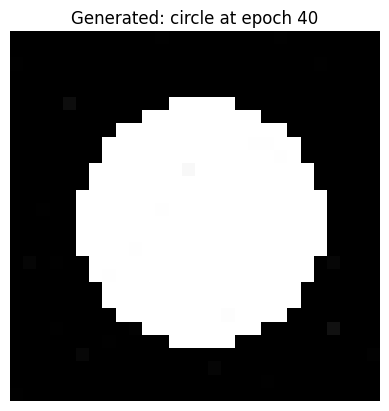

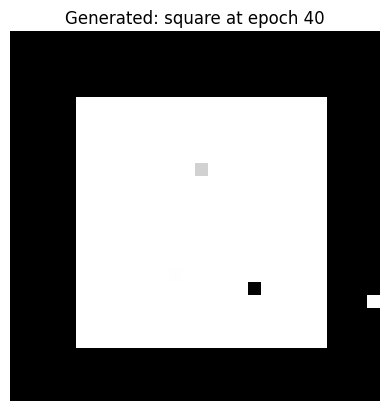

Epoch 41 | D Loss: 1.3731 | G Loss: 0.7546
Epoch 42 | D Loss: 1.3993 | G Loss: 0.7430
Epoch 43 | D Loss: 1.3749 | G Loss: 0.7424
Epoch 44 | D Loss: 1.3906 | G Loss: 0.7383
Epoch 45 | D Loss: 1.3807 | G Loss: 0.7415
Epoch 46 | D Loss: 1.3847 | G Loss: 0.7480
Epoch 47 | D Loss: 1.3856 | G Loss: 0.7472
Epoch 48 | D Loss: 1.3933 | G Loss: 0.7567
Epoch 49 | D Loss: 1.3681 | G Loss: 0.7446
Epoch 50 | D Loss: 1.3861 | G Loss: 0.7412


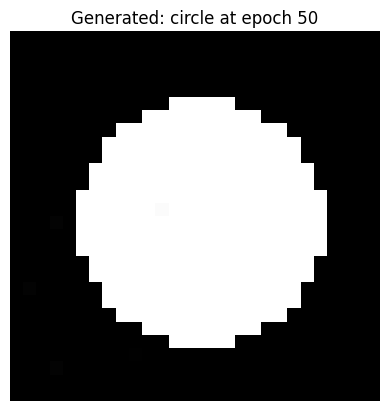

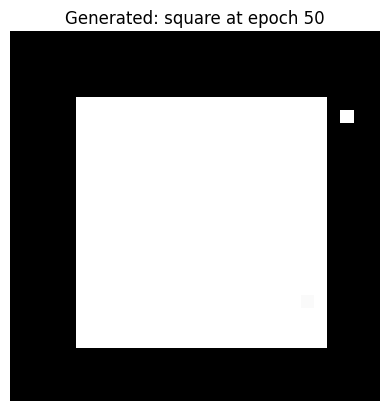

Epoch 51 | D Loss: 1.3744 | G Loss: 0.7593
Epoch 52 | D Loss: 1.3780 | G Loss: 0.7502
Epoch 53 | D Loss: 1.3819 | G Loss: 0.7421
Epoch 54 | D Loss: 1.3833 | G Loss: 0.7420
Epoch 55 | D Loss: 1.3716 | G Loss: 0.7474
Epoch 56 | D Loss: 1.3692 | G Loss: 0.7380
Epoch 57 | D Loss: 1.3797 | G Loss: 0.7404
Epoch 58 | D Loss: 1.3534 | G Loss: 0.7579
Epoch 59 | D Loss: 1.3875 | G Loss: 0.7526
Epoch 60 | D Loss: 1.3803 | G Loss: 0.7375


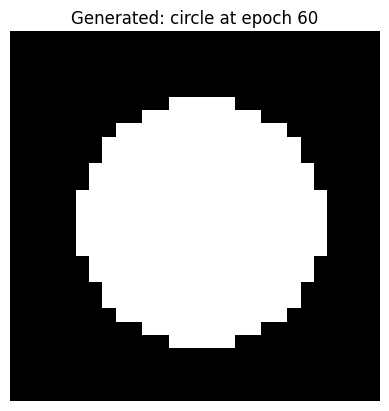

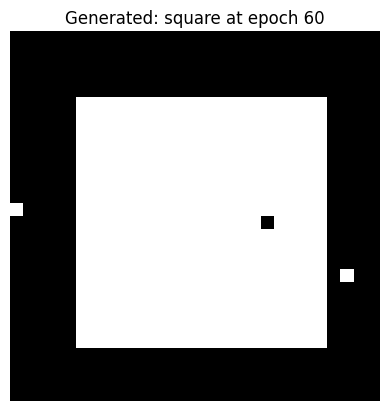

Epoch 61 | D Loss: 1.0288 | G Loss: 0.8815
Epoch 62 | D Loss: 0.8631 | G Loss: 1.8600
Epoch 63 | D Loss: 1.3533 | G Loss: 0.7677
Epoch 64 | D Loss: 1.3141 | G Loss: 0.7824
Epoch 65 | D Loss: 1.3475 | G Loss: 0.7705
Epoch 66 | D Loss: 1.3254 | G Loss: 0.7716
Epoch 67 | D Loss: 1.3748 | G Loss: 0.7862
Epoch 68 | D Loss: 1.3494 | G Loss: 0.7881
Epoch 69 | D Loss: 1.3615 | G Loss: 0.7784
Epoch 70 | D Loss: 1.3476 | G Loss: 0.7748


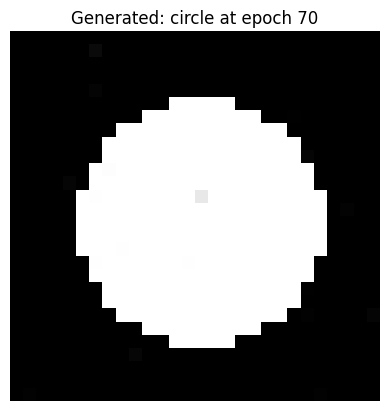

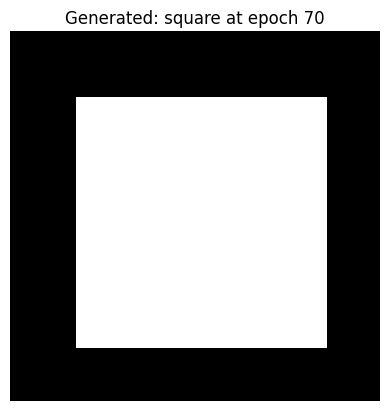

In [9]:
# Training Loop
for epoch in range(EPOCHS):
    for real_imgs, labels in loader:
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.view(batch_size, -1).to(device)
        labels = labels.to(device)
        label_oh = one_hot(labels, LABEL_DIM).to(device)

        # Discriminator
        z = torch.randn(batch_size, NOISE_DIM).to(device)
        fake_imgs = G(z, label_oh)

        real_preds = D(real_imgs, label_oh)
        fake_preds = D(fake_imgs.detach(), label_oh)

        real_targets = torch.full_like(real_preds, 0.95)
        fake_targets = torch.zeros_like(fake_preds)

        d_loss = bce_loss(real_preds, real_targets) + bce_loss(fake_preds, fake_targets)

        opt_D.zero_grad()
        d_loss.backward()
        opt_D.step()

        # Generator
        z = torch.randn(batch_size, NOISE_DIM).to(device)
        fake_imgs = G(z, label_oh)
        fake_preds = D(fake_imgs, label_oh)
        g_loss = bce_loss(fake_preds, torch.ones_like(fake_preds))

        opt_G.zero_grad()
        g_loss.backward()
        opt_G.step()

    print(f"Epoch {epoch+1} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    if (epoch + 1) % 10 == 0:
        G.eval()
        with torch.no_grad():
            for shape in SHAPES:
                z = torch.randn(1, NOISE_DIM).to(device)
                label_idx = torch.tensor([label_map[shape]]).to(device)
                label_oh = one_hot(label_idx, LABEL_DIM).to(device)
                img = G(z, label_oh).view(28, 28).cpu().numpy()
                plt.imshow(img, cmap='gray')
                plt.title(f"Generated: {shape} at epoch {epoch+1}")
                plt.axis('off')
                plt.show()
        G.train()


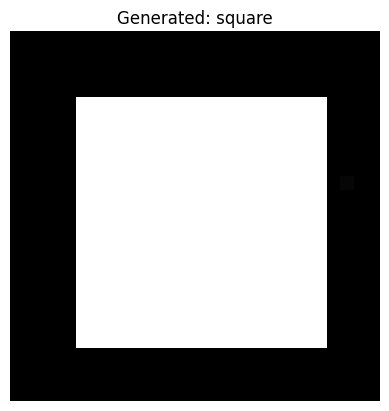

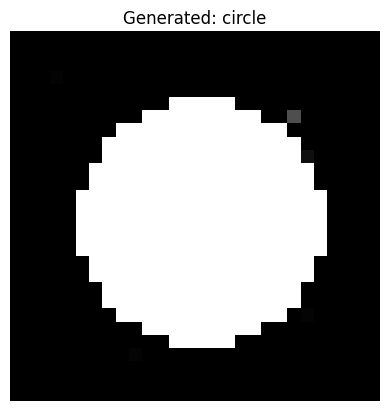

In [10]:

# Generate sample
def generate_shape(label_name):
    G.eval()
    z = torch.randn(1, NOISE_DIM).to(device)
    label_idx = torch.tensor([label_map[label_name]]).to(device)
    label_oh = one_hot(label_idx, LABEL_DIM).to(device)
    with torch.no_grad():
        img = G(z, label_oh).view(28, 28).cpu().numpy()
    plt.imshow(img, cmap='gray')
    plt.title(f"Generated: {label_name}")
    plt.axis('off')
    plt.show()
    G.train()

# Example
generate_shape("square")
generate_shape("circle")


Classification Report:
              precision    recall  f1-score   support

      circle       0.00      0.00      0.00       100
      square       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


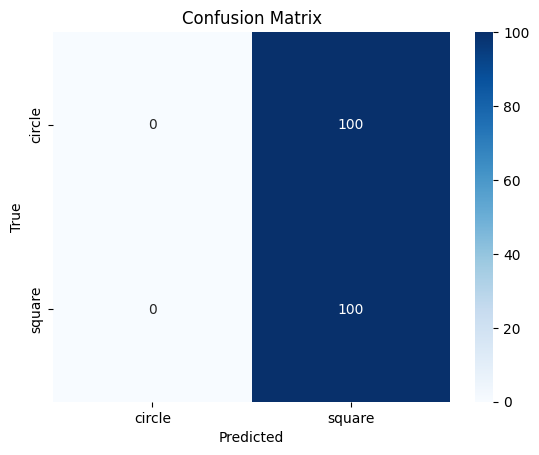

In [11]:
# Performance Evaluation for Conditional GAN using Classification Metrics

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_generator(generator, label_map, samples_per_class=100):
    generator.eval()
    all_preds = []
    all_labels = []

    for label_name, label_idx in label_map.items():
        for _ in range(samples_per_class):
            z = torch.randn(1, NOISE_DIM).to(device)
            label_tensor = torch.tensor([label_idx]).to(device)
            label_oh = one_hot(label_tensor, LABEL_DIM).to(device)
            with torch.no_grad():
                img_tensor = generator(z, label_oh).view(1, 28, 28)

            # Convert to PIL Image for rule-based classifier
            img_np = (img_tensor.squeeze().cpu().numpy() + 1) * 127.5
            img = Image.fromarray(img_np.astype(np.uint8))

            pred_label = classify_shape(img)
            all_preds.append(pred_label)
            all_labels.append(label_name)

    return all_labels, all_preds

def classify_shape(img):
    # Simple heuristic-based shape classifier
    np_img = np.array(img)
    thresholded = (np_img > 127).astype(np.uint8)
    contours = np.argwhere(thresholded)
    if len(contours) == 0:
        return "unknown"

    ys, xs = contours[:, 0], contours[:, 1]
    height, width = max(ys) - min(ys), max(xs) - min(xs)
    aspect_ratio = width / (height + 1e-5)

    # Estimate circularity by symmetry
    vertical_symmetry = np.all(thresholded[:, :14] == np.fliplr(thresholded[:, 14:]))

    if abs(aspect_ratio - 1) < 0.2 and vertical_symmetry:
        return "circle"
    else:
        return "square"

def display_metrics(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=SHAPES))

    cm = confusion_matrix(y_true, y_pred, labels=SHAPES)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=SHAPES, yticklabels=SHAPES)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Run evaluation
true_labels, predicted_labels = evaluate_generator(G, label_map)
display_metrics(true_labels, predicted_labels)
